In [106]:
from typing import (
    Callable, List
)

import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import numpy as np

In [107]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [108]:
class Schedule_Factory:
    def __init__(self, epochs):
        self.epochs = epochs
    
    def constant_schedule(self, learning_rate: float) -> Callable[[int], float]:
        return lambda x: learning_rate
    
    def linear_schedule(self, starting_rate:float, ending_rate:float) -> Callable[[int], float]:
        def lin_sched_fn(epoch:int):
            lrs = np.linspace(starting_rate, ending_rate, self.epochs)
            return lrs[epoch]
        
        return lin_sched_fn
    
    def step_schedule(self, transitions:List, rates:List) -> Callable[[int], float]:
        lrs = np.empty(self.epochs)
        
        lrs[:transitions[0]] = rates[0]
        
        for i, transition in enumerate(transitions[1:]):
            lrs[transitions[i]:transitions[i+1]] = rates[i+1]
        
        lrs[transitions[-1]:]=rates[-1]
        
        def step_sched_fn(epoch):
            return lrs[epoch]
        
        return step_sched_fn
    
    def sine_trend_schedule(self, starting_lr: float,
                   ending_lr: float,
                   frequency: int,
                   amplitude: float
        ) -> Callable[[int], float]:
        A = np.linspace(0, self.epochs, self.epochs, dtype=np.float)
        T = np.linspace(starting_lr, ending_lr, self.epochs)
        S = np.sin(2 * np.pi * frequency * A)

        lrs = T + (S * amplitude)

        def step_sched_fn(epoch):
            return lrs[epoch]
            
        return step_sched_fn
    
    def uniform_random_discontinuous(self, max_lr: float, min_lr: float) -> Callable[[int], float]:
        R = np.random.random(self.epochs)
        lrs = R * (max_lr - min_lr) + min_lr
        
        def step_sched_fn(epoch):
            return lrs[epoch]
        
        return step_sched_fn
    
    def noisy_trend(self, starting_lr: float
        ) -> Callable[[int], float]:
            

In [109]:
factory = Schedule_Factory(100)

In [110]:
const_fn = factory.constant_schedule(0.001)
linear_fn = factory.linear_schedule(0.01, 0.001)
step_fn = factory.step_schedule([25,75],[0.01,0.005,0.001])
sin_fn = factory.sine_trend_schedule(0.01,0.001,6,0.0005)
urd_fn = factory.uniform_random_discontinuous(0.01,0.005)

In [111]:
const_fn(25)

0.001

In [112]:
linear_fn(5)

0.009545454545454546

In [113]:
linear_fn(95)

0.0013636363636363637

In [114]:
S = [sin_fn(x) for x in range(100)]
U = [urd_fn(x) for x in range(100)]

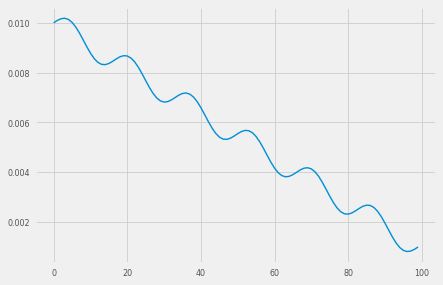

In [115]:
plt.plot(S)

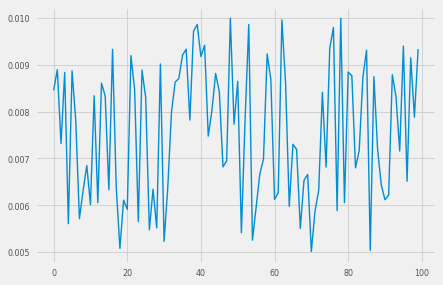

In [116]:
plt.plot(U)

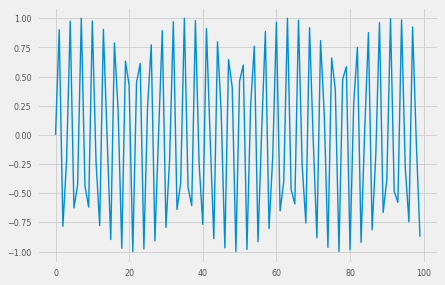

In [117]:
n_steps=100
slope=2

plt.plot(np.sin(np.linspace(0, n_steps*slope, n_steps)))

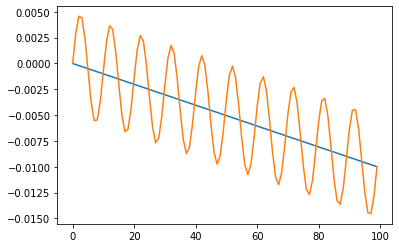

In [60]:
n_steps = 100
slope = -0.01 / n_steps
frequency = 10
amplitude = 0.005
starting_lr = 0.01

A = np.linspace(0,n_steps,n_steps)
T = np.linspace(0,n_steps * slope,n_steps)
S = np.sin(2 * np.pi * frequency * A)

plt.plot(T)
#plt.plot(S)
plt.plot(T + S * 0.005)

In [11]:
import torch

import torchvision.models as models
from torchvision import transforms

In [12]:
from tqdm import tqdm
from PACS_Dataloader.PACS_Dataloader import PACS_Dataset

In [13]:
HOLDOUT_DOMAIN = "photo"
split_name = "train"

In [14]:
pacs_dl = torch.utils.data.DataLoader(
        PACS_Dataset(HOLDOUT_DOMAIN, split_name), batch_size=30, shuffle=True
)

In [15]:
batch_data, batch_labels = next(iter(pacs_dl))

In [25]:
batch_data.dtype

torch.float64

In [16]:
rnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [17]:
type(rnet)

torchvision.models.resnet.ResNet

In [18]:
print(rnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
rnet(batch_data.float()).shape

torch.Size([30, 1000])